In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
data = pd.read_csv('../data/Emotion_final.csv')

In [19]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


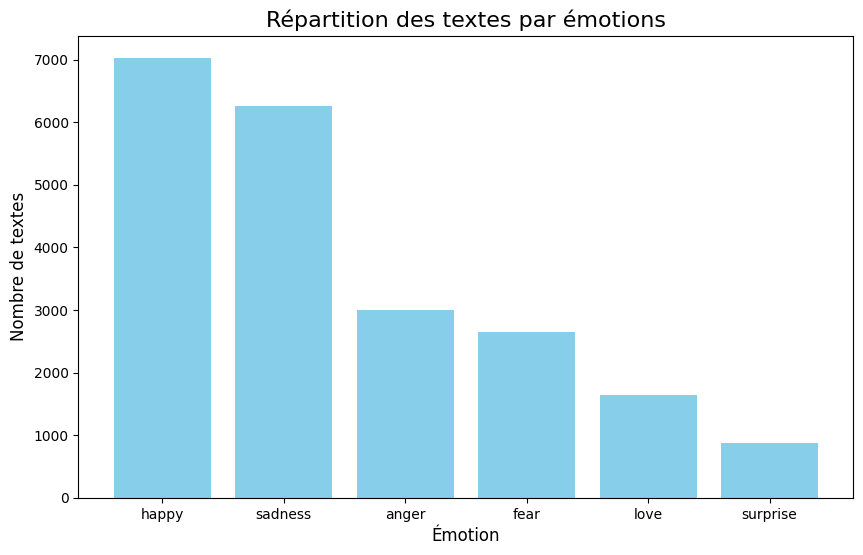

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

In [35]:
# répartition des textes par émotions
emotion_counts = data['Emotion'].value_counts()
emotion_counts

import matplotlib.pyplot as plt

# Obtention des comptes d'émotions
emotion_counts = data['Emotion'].value_counts()

# Configuration du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')

# Ajout de titres et d'étiquettes d'axe
plt.title('Répartition des textes par émotions', fontsize=16)
plt.xlabel('Émotion', fontsize=12)
plt.ylabel('Nombre de textes', fontsize=12)

# Affichage du graphique
plt.show()

emotion_counts


## Les Stopwords

**_ntlk.download('stopwords')_** : permet de télécharger la liste des stopwords en anglais à partir du package NLTK (Natural Language Toolkit). La première fois que vous exécutez cette ligne, NLTK téléchargera les stopwords depuis Internet. Cela ne doit être fait qu'une seule fois.

**_stopwords = stopwords.words('english')_** : charge les stopwords anglais dans une variable appelée "stopwords". Cette liste de stopwords sera utilisée ultérieurement pour filtrer les mots courants lors de l'analyse des textes.

In [21]:
# les stopwords potentiels
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Identifier les 30 mots les plus courants pour chaque sentiment

In [42]:
#Pour chaque sentiment, identifiez les 30 mots les plus courants en dehors des stopwords

nltk.download('punkt') # télécharge les ressources nécessaires pour effectuer la tokenisation des mots en utilisant la fonction word_tokenize de NLTK.

emotions = data['Emotion'].unique()
# Initialisation du dictionnaire pour stocker les fréquences des mots par émotion
emotion_word_counts = {}

for emotion in emotions:
    filtered_text = ' '.join(data[data['Emotion'] == emotion]['Text'])  # elle filtre les textes correspondants à cette émotion à partir du DataFrame data et les concatène en une seule chaîne de texte
    word_tokens = word_tokenize(filtered_text.lower()) # Cette ligne utilise la fonction word_tokenize de NLTK pour diviser la chaîne de texte filtrée en une liste de mots (tokens). Les mots sont convertis en minuscules à l'aide de la méthode lower() pour assurer une consistance dans l'analyse des mots.
    filtered_words = [word for word in word_tokens if word.isalpha() and word not in stopwords] # Cette ligne utilise une compréhension de liste pour filtrer les mots tokens. Les mots sont filtrés en vérifiant s'ils sont composés uniquement de caractères alphabétiques (word.isalpha()) et s'ils ne sont pas présents dans la liste des stopwords (stopwords).
    fdist = FreqDist(filtered_words) # Cette ligne crée un objet de la classe FreqDist de NLTK, qui calcule la fréquence de chaque mot dans la liste filtered_words.
    emotion_word_counts[emotion] = fdist
    
# Obtention des mots les plus courants pour chaque émotion
common_words = set()
for emotion in emotions:
    common_words.update([word for word, _ in emotion_word_counts[emotion].most_common(30)])
    

# Affichage des mots les plus courants pour chaque émotion
for emotion in emotions:
    print(emotion)
    print(emotion_word_counts[emotion].most_common(30))
    

# Affichage des mots communs
print(common_words)


[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sadness
[('feel', 4095), ('feeling', 1924), ('like', 1078), ('im', 875), ('really', 352), ('know', 344), ('get', 289), ('would', 273), ('time', 270), ('little', 267), ('ive', 266), ('still', 243), ('even', 239), ('want', 237), ('one', 230), ('life', 228), ('people', 226), ('think', 222), ('bit', 220), ('things', 194), ('much', 191), ('dont', 190), ('make', 183), ('day', 177), ('something', 170), ('back', 167), ('going', 164), ('way', 162), ('could', 159), ('pretty', 146)]
anger
[('feel', 1803), ('feeling', 923), ('like', 479), ('im', 426), ('really', 171), ('get', 154), ('people', 150), ('know', 149), ('time', 146), ('little', 136), ('want', 129), ('even', 125), ('would', 118), ('angry', 116), ('think', 111), ('one', 108), ('could', 108), ('things', 105), ('bit', 103), ('way', 102), ('offended', 92), ('dont', 91), ('resentful', 87), ('cold', 86), ('still', 85), ('something', 85), ('irritable', 84), ('cant', 83), ('going', 81), ('bothered', 81)]
love
[('feel', 1180), ('feeling', 471), (

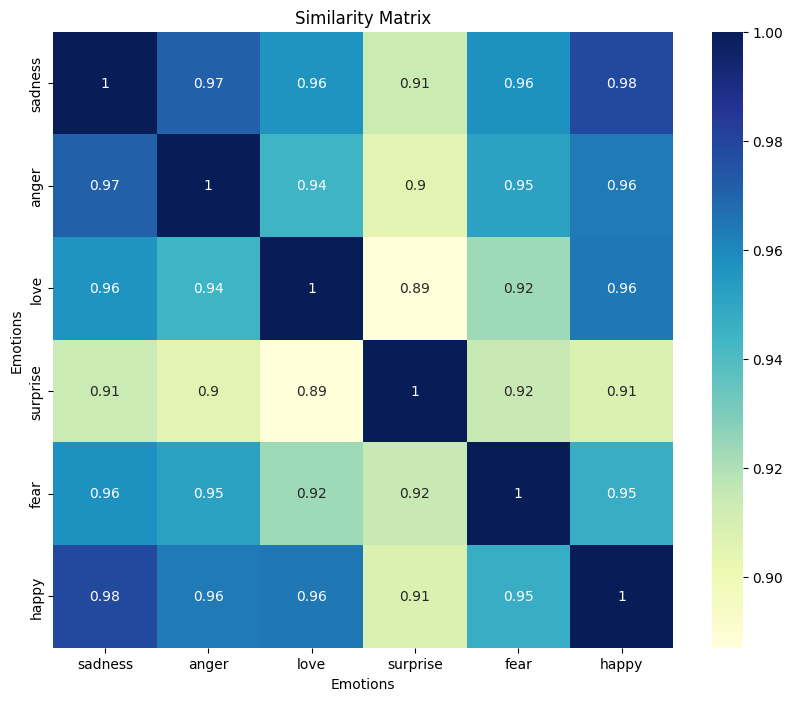

In [45]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Création d'une matrice vide pour stocker les similarités
similarity_matrix = np.zeros((len(emotions), len(emotions)))

# Obtention de tous les mots à partir des émotions
all_words = set()
for emotion in emotions:
    all_words.update(emotion_word_counts[emotion].keys())

# Conversion des vecteurs de fréquence des mots en tableaux numpy de la même dimension
word_counts_array = np.zeros((len(emotions), len(all_words)))
for i, emotion in enumerate(emotions):
    word_counts = emotion_word_counts[emotion]
    for j, word in enumerate(all_words):
        word_counts_array[i, j] = word_counts[word]

# Calcul des similarités
for i in range(len(emotions)):
    for j in range(len(emotions)):
        similarity = cosine_similarity([word_counts_array[i]], [word_counts_array[j]])[0][0]
        similarity_matrix[i, j] = similarity

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.title('Similarity Matrix')
plt.show()



In [49]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Téléchargement des ressources nécessaires pour la tokenisation et la lemmatisation
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Chargement des données
data = pd.read_csv('../data/Emotion_final.csv')

# Prétraitement des données
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenisation des mots
    words = word_tokenize(text.lower())

    # Suppression de la ponctuation et des caractères spéciaux
    words = [word for word in words if word.isalnum()]

    # Suppression des stopwords
    words = [word for word in words if word not in stopwords]

    # Lemmatisation des mots
    words = [lemmatizer.lemmatize(word) for word in words]

    # Reconstitution du texte prétraité
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Prétraitement de tous les textes
data['PreprocessedText'] = data['Text'].apply(preprocess_text)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['PreprocessedText'], data['Emotion'], test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
data

,Text,Emotion,PreprocessedText
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,melissa stared friend dism
21455,Successive state elections have seen the gover...,fear,successive state election seen governing party...
21456,Vincent was irritated but not dismay,fear,vincent irritated dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,turned back face dismayed coup


## Modele Bag of Words

In [50]:
# Modèle Bag of Words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Entraînement du modèle de régression logistique avec Bag of Words
bow_model = LogisticRegression()
bow_model.fit(X_train_bow, y_train)

# Prédictions avec le modèle Bag of Words
y_pred_bow = bow_model.predict(X_test_bow)
bow_accuracy = accuracy_score(y_test, y_pred_bow)
print('Accuracy (Bag of Words):', bow_accuracy)

Accuracy (Bag of Words): 0.8946877912395154


/home/apprenant/miniconda3/envs/nlp_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Modele TF IDF

In [51]:
# Modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraînement du modèle de régression logistique avec TF-IDF
tfidf_model = LogisticRegression()
tfidf_model.fit(X_train_tfidf, y_train)

# Prédictions avec le modèle TF-IDF
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)
tfidf_accuracy = accuracy_score(y_test, y_pred_tfidf)
print('Accuracy (TF-IDF):', tfidf_accuracy)

Accuracy (TF-IDF): 0.8767474370922647


/home/apprenant/miniconda3/envs/nlp_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Mapper et importer les données

In [3]:
import requests

mapping = {
    "mappings": {
        "properties": {
            "patient_lastname": {"type": "keyword"},
            "patient_firstname": {"type": "keyword"},
            "text": {"type": "text", "analyzer": "standard"},
            "date": {"type": "date"},
            "patient_left": {"type": "boolean"},
            "emotion": {"type": "keyword"},
            "confidence": {"type": "float"}
        }
    }
}

response = requests.put("http://localhost:9200/notes", json=mapping)
print(response.json())


{'error': {'root_cause': [{'type': 'resource_already_exists_exception', 'reason': 'index [notes/oap9oRjyR3q9GkjhWaeRMA] already exists', 'index_uuid': 'oap9oRjyR3q9GkjhWaeRMA', 'index': 'notes'}], 'type': 'resource_already_exists_exception', 'reason': 'index [notes/oap9oRjyR3q9GkjhWaeRMA] already exists', 'index_uuid': 'oap9oRjyR3q9GkjhWaeRMA', 'index': 'notes'}, 'status': 400}


In [5]:
from faker import Faker
import random
import datetime
import json


fake = Faker()

# Génération de fausses données
data = []
for _ in range(100):
    note = {
        "patient_lastname": fake.last_name(),
        "patient_firstname": fake.first_name(),
        "text": fake.paragraph(nb_sentences=5),
        "date": fake.date_between(start_date="-1y", end_date="today").strftime("%Y-%m-%d"),
        "patient_left": random.choice([True, False]),
        "emotion": random.choice(["happy", "sad", "angry", "calm"]),
        "confidence": random.uniform(0.0, 1.0)
    }
    data.append(note)

# Import des données dans l'index "notes"
bulk_data = ""
for note in data:
    index_line = {"index": {"_index": "notes"}}
    data_line = note
    bulk_data += f"{json.dumps(index_line)}\n{json.dumps(data_line)}\n"

response = requests.post("http://localhost:9200/_bulk", data=bulk_data, headers={"Content-Type": "application/json"})
print(response.json())


{'took': 75, 'errors': False, 'items': [{'index': {'_index': 'notes', '_type': '_doc', '_id': '5ZcxIIkBWli0xZpAhP_Y', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'notes', '_type': '_doc', '_id': '5pcxIIkBWli0xZpAhP_Y', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'notes', '_type': '_doc', '_id': '55cxIIkBWli0xZpAhP_Y', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 2, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'notes', '_type': '_doc', '_id': '6JcxIIkBWli0xZpAhP_Y', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 3, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'notes', '_type': '_doc', '_id': '6ZcxIIkBWli0xZpAhP_Y', '_